In [201]:
%matplotlib notebook
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [191]:
# Read CSV
ride_CSV = pd.read_csv("HOMEWORK/Instructions/Pyber/raw_data/ride_data.csv")
#print(ride_CSV.head())
city_CSV = pd.read_csv("HOMEWORK/Instructions/Pyber/raw_data/city_data.csv")
#city_CSV.head()

In [190]:
# Average Fare ($) Per City
rides_per_city_df = ride_CSV.groupby('city')
avg_rides = rides_per_city_df['fare'].mean()
avg_rides = pd.DataFrame(avg_rides)
#avg_rides.head()

In [189]:
# Total Number of Rides Per City
city_rides = rides_per_city_df['fare'].count()
city_rides = pd.DataFrame(city_rides)
#city_rides.head()

In [188]:
# Total Number of Drivers Per City
city_drivers = city_CSV[['city','driver_count']]
city_drivers = pd.DataFrame(city_drivers)
city_drivers=city_drivers.set_index('city')
#city_drivers.head()

In [187]:
# City Type (Urban, Suburban, Rural)
city_type = city_CSV[['city','type']]
city_type = pd.DataFrame(city_type)
city_type=city_type.set_index('city')
#city_type.head()

In [192]:
#Combine combined dataframe of the above information
city_df= pd.DataFrame({
    "number_of_rides": city_rides['fare'],
    "average_fare": avg_rides['fare'],
    "number_of_drivers": city_drivers['driver_count'],
    "type": city_type['type']
})
#city_df.head()

In [184]:
#create Data the three different plot groups
urban_df = city_df[city_df['type'] == 'Urban']
suburban_df = city_df[city_df['type'] == 'Suburban']
rural_df = city_df[city_df['type'] == 'Rural']


<IPython.core.display.Javascript object>


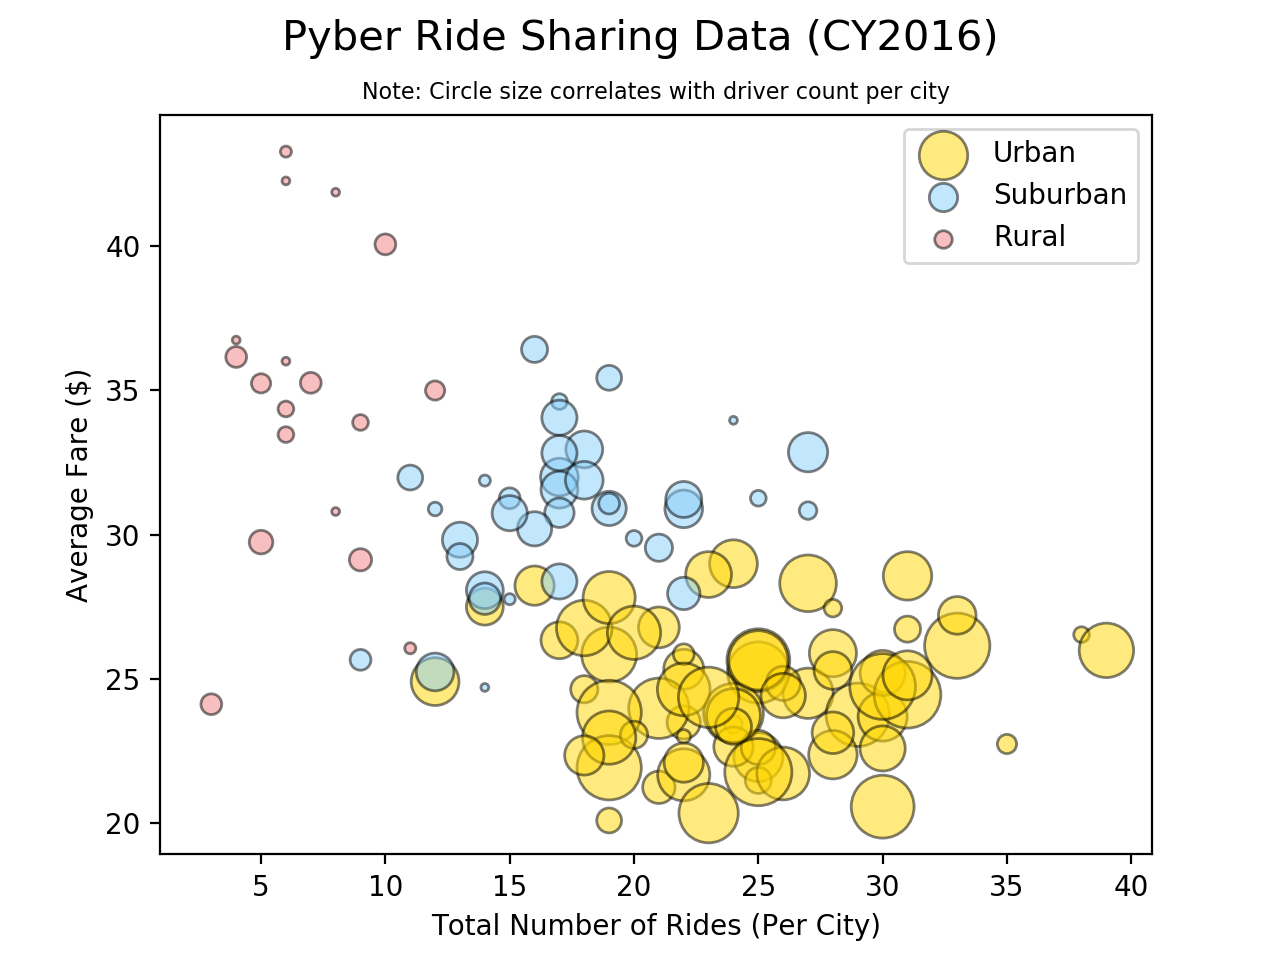

In [204]:
#Urban Plot
plt.figure(1)
u_x = urban_df['number_of_rides']
u_y = urban_df['average_fare']
u_z = urban_df['number_of_drivers']

#Suburban Plot
s_x = suburban_df['number_of_rides']
s_y = suburban_df['average_fare']
s_z = suburban_df['number_of_drivers']

#Rural Plot
r_x = rural_df['number_of_rides']
r_y = rural_df['average_fare']
r_z = rural_df['number_of_drivers']

#combine the plots and create bubble chart
plt.scatter(u_x,u_y,s=u_z*8, c="Gold", alpha=0.5, linewidth=1,edgecolor ='black',label = 'Urban')
plt.scatter(s_x,s_y,s=s_z*8, c="LightSkyBlue", alpha=0.5, linewidth=1,edgecolor ='black',label = 'Suburban')
plt.scatter(r_x,r_y,s=r_z*8, c="LightCoral", alpha=0.5, linewidth=1,edgecolor ='black',label = 'Rural')

plt.suptitle('Pyber Ride Sharing Data (CY2016)',size = 15)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.title('Note: Circle size correlates with driver count per city',size=8)
plt.show()

In [195]:
# get the total fares per city because it wasn't created above
sum_fare = ride_CSV.groupby('city')
sum_fare = sum_fare['fare'].sum()
sum_fare = pd.DataFrame(sum_fare)

sum_fare.head()
pie_data_df= pd.DataFrame({
    "number_of_rides": city_rides['fare'],
    "average_fare": avg_rides['fare'],
    "number_of_drivers": city_drivers['driver_count'],
    "type": city_type['type'],
    'city_sum':sum_fare['fare']
})
#pie_data_df.head()

<IPython.core.display.Javascript object>


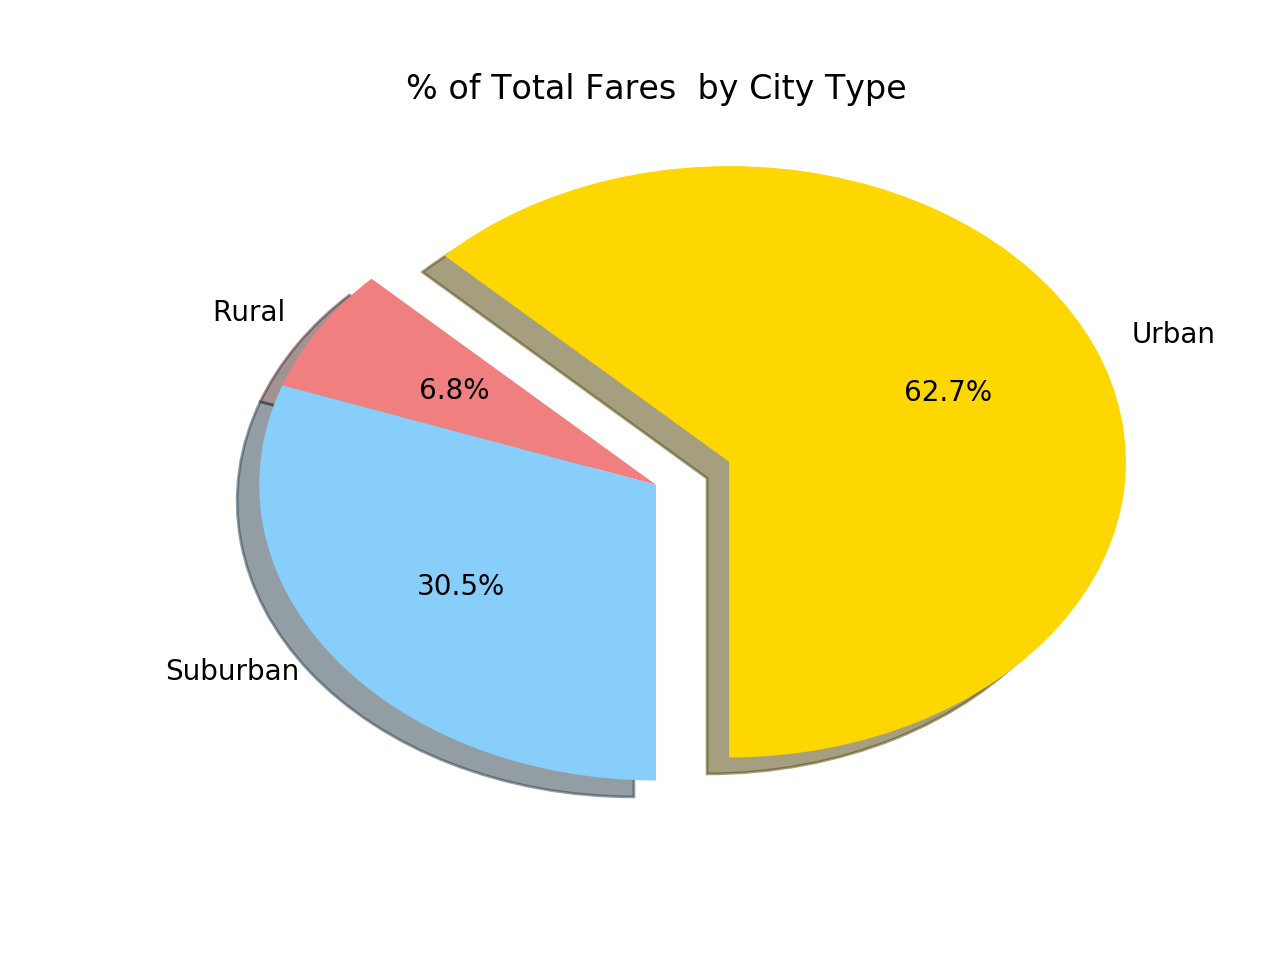

In [203]:
#% of Total Fares by City Type
plt.figure(2)
pie1labels = ['Urban', 'Rural','Suburban']

grouptype_df = pie_data_df.groupby('type')
grouptype_df = grouptype_df['city_sum'].sum()

pie1sizes = [grouptype_df[2],grouptype_df[0],grouptype_df[1]]

colors = ["Gold","LightCoral","LightSkyBlue"]
explode = (0.2, 0, 0)

plt.pie(pie1sizes, explode=explode, labels=pie1labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)

plt.title('% of Total Fares  by City Type')
plt.show()

<IPython.core.display.Javascript object>


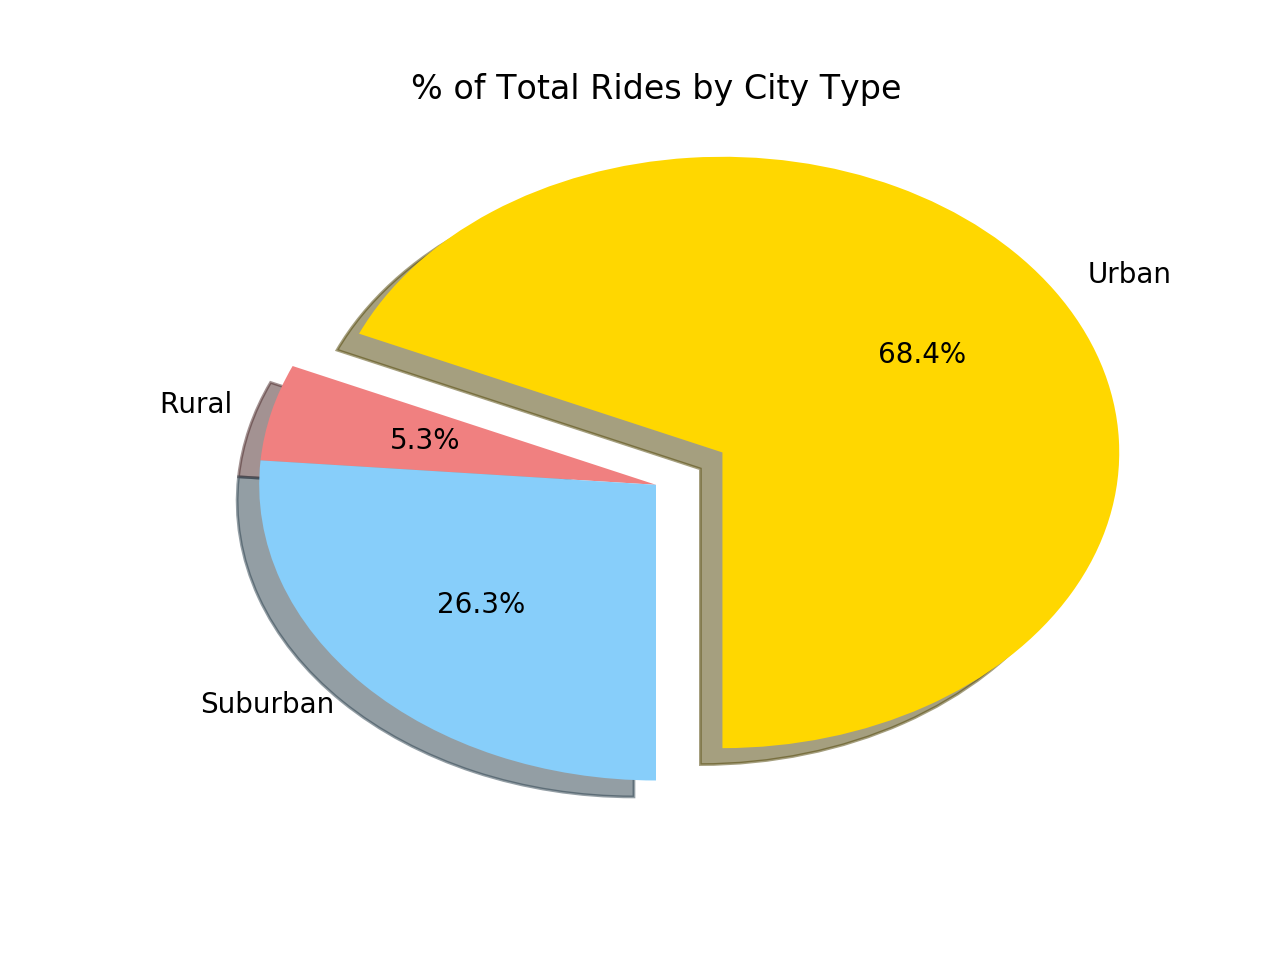

In [198]:
plt.figure(3)
pie1labels = ['Urban', 'Rural','Suburban']

grouptype_df = pie_data_df.groupby('type')
grouptype_df = grouptype_df['number_of_rides'].sum()

pie1sizes = [grouptype_df[2],grouptype_df[0],grouptype_df[1]]

colors = ["Gold","LightCoral","LightSkyBlue"]
explode = (0.2, 0, 0)

plt.pie(pie1sizes, explode=explode, labels=pie1labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title('% of Total Rides by City Type')
plt.show()

<IPython.core.display.Javascript object>


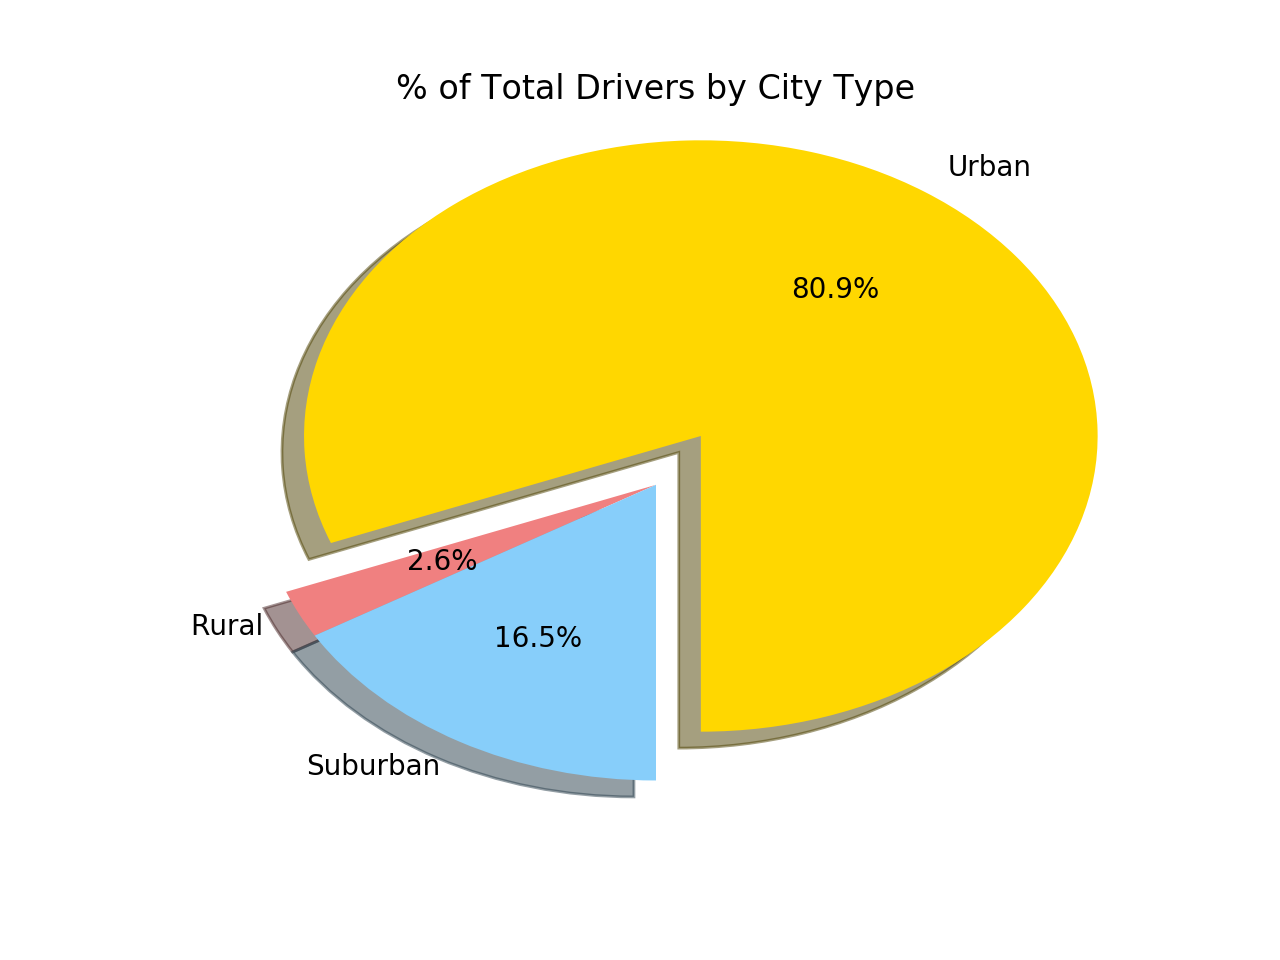

In [199]:
plt.figure(4)
pie1labels = ['Urban', 'Rural','Suburban']

grouptype_df = pie_data_df.groupby('type')
grouptype_df = grouptype_df['number_of_drivers'].sum()

pie1sizes = [grouptype_df[2],grouptype_df[0],grouptype_df[1]]

colors = ["Gold","LightCoral","LightSkyBlue"]
explode = (0.2, 0, 0)

plt.pie(pie1sizes, explode=explode, labels=pie1labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)

plt.title('% of Total Drivers by City Type')
plt.show()